In [513]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualizing the dataset

In [514]:
#Reading and visualization
file = pd.read_csv("./nonlinear_data.txt", header=None)

# randomizing the data
file = file.sample(frac=1, random_state=3)

# split index
training_set_index = round(len(file) * 0.8)

# convert to numpy
file = file.to_numpy()

# split into train and test set
training_set = file[:training_set_index]
testing_set = file[training_set_index:]

In [515]:
def print_scatter(file, which_set):
    positive_mask = file[:, -1] == 1
    negative_mask = file[:, -1] == 0
    positives = file[positive_mask, :]
    negatives = file[negative_mask, :]
    plt.scatter(positives[:, 0], positives[:, 1], color='blue')
    plt.scatter(negatives[:, 0], negatives[:, 1], color="orange")
    plt.title(which_set)

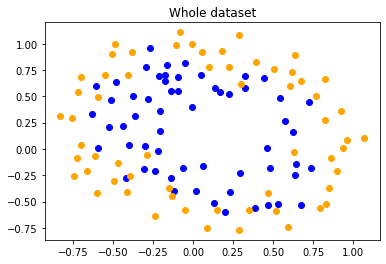

In [516]:
print_scatter(file, "Whole dataset")

# Data Cleaning

In [517]:
X = training_set[:, :-1]
Y = training_set[:, [-1]]

# Utility Functions

In [518]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [519]:
def stick_column_with_one(X):
    n = X.shape[0]
    ones = np.ones((n, 1))
    return np.hstack((ones, X))

In [520]:
def feature_mapping(x_calc, degree):
    # this can be done for any number of features by permutations.
    # i'm too lazy to do it rn
    x1 = x_calc[:, [0]]
    x2 = x_calc[:, [1]]
    for i in range(2, degree+1):
        for j in range(0, i+1):
            x1power = x1**j
            x2power = x2**(i-j)
            x_calc = np.append(x_calc, x1power * x2power, axis=1)
    return x_calc

# Training the parameters

In [521]:
# The gradient descent function for logistic regression
def gradient_descent(X, Y, learning_rate, num_iters, degree=2):
    # normalizing the input and formatting
    x_min = X.min(axis=0, keepdims=True)
    x_max = X.max(axis=0, keepdims=True)
    x_calc = (X - x_min) / (x_max - x_min)

    # feature mapping
    x_calc = feature_mapping(x_calc, degree)
    
    x_calc = stick_column_with_one(x_calc)

    n, d = x_calc.shape
    theta = np.zeros((d, 1))

    for _ in range(num_iters):
        prediction = sigmoid(np.matmul(x_calc, theta))
        error = Y - prediction
        theta += (learning_rate/n) * (x_calc.T @ error)

    def predict(x_predict, params=False):
        """predicts value based on training, returns parameters if params=True"""
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        # feaure map
        x_c = feature_mapping(x_c, degree)
        x_c = stick_column_with_one(x_c)
        # sigmoid and predict
        our_prediction = sigmoid(np.matmul(x_c, theta))
        return np.where(our_prediction >= 0.5, 1, 0)

    return predict

# Predicting

In [522]:
predictor = gradient_descent(X, Y, 0.1, 100000, 6)

The values of thetas are printed below

In [523]:
print(predictor(0, 1))

[[-7.96199978]
 [15.77869641]
 [13.24695843]
 [-2.34664817]
 [14.22292416]
 [-4.24645091]
 [-5.93628941]
 [ 2.42598478]
 [-2.14645111]
 [-5.94887119]
 [-4.63512863]
 [-2.30139138]
 [-5.3826813 ]
 [-4.4335725 ]
 [-3.57889641]
 [-1.86467315]
 [-4.00641387]
 [-6.41663375]
 [-5.01217785]
 [-3.08081699]
 [-1.90742782]
 [ 1.03319815]
 [-4.32873741]
 [-6.62919329]
 [-5.07816007]
 [-2.91871287]
 [-1.74031967]
 [-1.49208292]]


# Testing the Accuracy

In [524]:
testing_xs = testing_set[:, :-1]
testing_ys = testing_set[:, [-1]]
predicted_ys = predictor(testing_xs)
total_predictions = predicted_ys.size
accuracy = (predicted_ys == testing_ys).sum() / total_predictions
print(accuracy)

0.7916666666666666
